FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/mst_slide1.png'

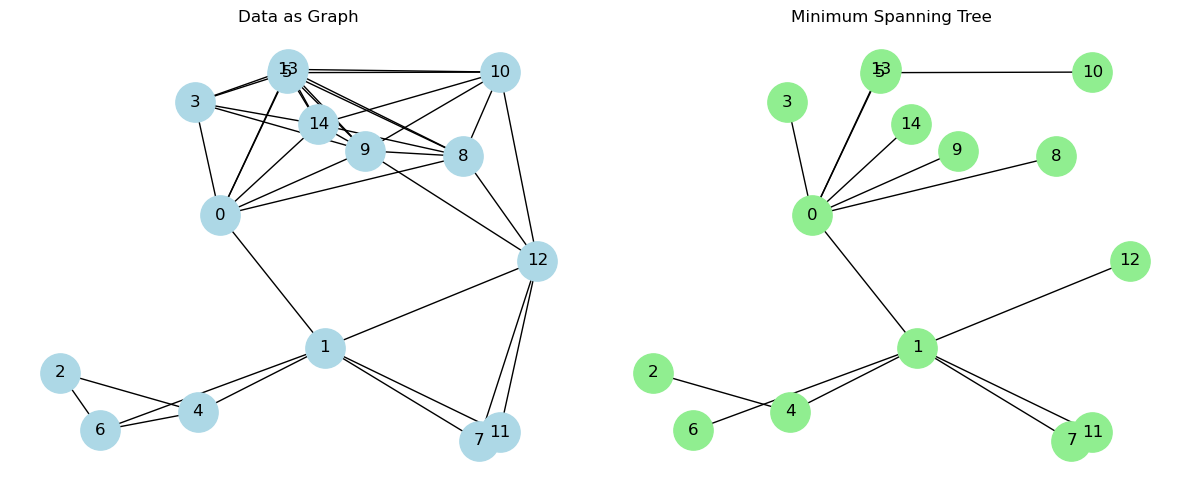

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Generate a random graph for demonstration purposes
np.random.seed(0)
G = nx.random_geometric_graph(15, 0.5)

# Generate a Minimum Spanning Tree
mst = nx.minimum_spanning_tree(G)

# Slide 1 Visualization: Full Graph with MST
plt.figure(figsize=(12, 5))

# Original graph
plt.subplot(1, 2, 1)
pos = nx.get_node_attributes(G, "pos")
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800)
plt.title("Data as Graph")

# MST
plt.subplot(1, 2, 2)
nx.draw(mst, pos, with_labels=True, node_color='lightgreen', node_size=800)
plt.title("Minimum Spanning Tree")

plt.tight_layout()
slide_1_img_path = "/mnt/data/mst_slide1.png"
plt.savefig(slide_1_img_path)
plt.close()

# Slide 2 Visualization: MST with Clusters
plt.figure(figsize=(6, 5))

# Remove the two longest edges to demonstrate clusters
edges_sorted_by_weight = sorted(mst.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
mst.remove_edge(*edges_sorted_by_weight[0][:2])
mst.remove_edge(*edges_sorted_by_weight[1][:2])

nx.draw(mst, pos, with_labels=True, node_color='lightcoral', node_size=800)
plt.title("MST-Based Clustering")

slide_2_img_path = "/mnt/data/mst_slide2.png"
plt.savefig(slide_2_img_path)
plt.close()

slide_1_img_path, slide_2_img_path


In [1]:
# Assign weights to the edges based on Euclidean distance between nodes
for u, v, d in G.edges(data=True):
    d['weight'] = np.linalg.norm(np.array(pos[u]) - np.array(pos[v]))

# Recompute the Minimum Spanning Tree with weights
mst = nx.minimum_spanning_tree(G)

# Slide 1 Visualization: Full Graph with MST
plt.figure(figsize=(12, 5))

# Original graph
plt.subplot(1, 2, 1)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800)
plt.title("Data as Graph")

# MST
plt.subplot(1, 2, 2)
nx.draw(mst, pos, with_labels=True, node_color='lightgreen', node_size=800)
plt.title("Minimum Spanning Tree")

plt.tight_layout()
slide_1_img_path = "/mnt/data/mst_slide1_corrected.png"
plt.savefig(slide_1_img_path)
plt.close()

# Slide 2 Visualization: MST with Clusters
plt.figure(figsize=(6, 5))

# Remove the two longest edges to demonstrate clusters
edges_sorted_by_weight = sorted(mst.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
mst.remove_edge(*edges_sorted_by_weight[0][:2])
mst.remove_edge(*edges_sorted_by_weight[1][:2])

nx.draw(mst, pos, with_labels=True, node_color='lightcoral', node_size=800)
plt.title("MST-Based Clustering")

slide_2_img_path = "/mnt/data/mst_slide2_corrected.png"
plt.savefig(slide_2_img_path)
plt.close()

slide_1_img_path, slide_2_img_path


NameError: name 'G' is not defined

In [3]:
from pptx import Presentation
from pptx.util import Inches

# Create a new presentation
prs = Presentation()

# Define slide layout
slide_layout = prs.slide_layouts[5]  # Title Slide layout
slide = prs.slides.add_slide(slide_layout)

# Set slide title
title = slide.shapes.title
title.text = "Disadvantages of MST-based Clustering"

# Add the disadvantages as bullet points
txBox = slide.shapes.add_textbox(Inches(1), Inches(1.5), Inches(8), Inches(5))
tf = txBox.text_frame
tf.margin_left = Inches(0.5)
tf.margin_right = Inches(0.5)

disadvantages = [
    "Computational Complexity: High complexity for large datasets.",
    "Sensitivity to Distance Metric: Quality depends heavily on the distance metric used.",
    "Arbitrary Cluster Shapes: Shapes determined by the MST structure.",
    "Choice of Threshold: Difficult to decide which edges to remove.",
    "High-dimensional Data: Not scalable; suffers from the curse of dimensionality.",
    "Single Linkage Effect: Can result in elongated clusters.",
    "Noisy Data: Sensitive to noise, altering clustering results."
]

for disadvantage in disadvantages:
    p = tf.add_paragraph()
    p.text = disadvantage
    p.space_after = Inches(0.2)

# Save the presentation
slide_path = "/mnt/data/mst_disadvantages_slide.pptx"
prs.save(slide_path)

slide_path


ModuleNotFoundError: No module named 'pptx'

In [ ]:
def mst(graph , name):
    edges = []
    for src, neighbors in graph.items():
        for dest in neighbors:
            if (src, dest) not in edges and (dest, src) not in edges:
                edges.append((src, dest, distance(src, dest)))

    # Sort edges by weight
    edges.sort(key=lambda x: x[2])

    # Helper function to find set of an item (with path compression)
    def find(item, parent):
        if parent[item] == item:
            return item
        parent[item] = find(parent[item], parent)  # Path compression
        return parent[item]

    # Helper function to union two sets
    def union(set1, set2, parent, rank):
        root1 = find(set1, parent)
        root2 = find(set2, parent)

        if root1 != root2:
            if rank[root1] > rank[root2]:
                parent[root2] = root1
            else:
                parent[root1] = root2
                if rank[root1] == rank[root2]:
                    rank[root2] += 1

    # Kruskal's algorithm
    def kruskal(edges):
        mst_dict = {pt : set() for pt in points}  # The MST in the desired format
        parent = {v: v for v, _, _ in edges}
        rank = {v: 0 for v, _, _ in edges}

        for edge in edges:
            src, dest, weight = edge
            if find(src, parent) != find(dest, parent):
                if src not in mst_dict:
                    mst_dict[src] = set()
                mst_dict[src].add(dest)

                union(src, dest, parent, rank)

        return mst_dict

    matplot(kruskal(edges) , name + " MST")
    return kruskal(edges)

    # Get the Minimum Spanning Tree
    
    

In [ ]:
def find_closest_clusters(cluster_list, broken_mst):
    cluster_connected = copy.deepcopy(broken_mst)
    curr = cluster_list[0]
    visited_id = set([curr[0]])
    no_of_clusters = len(cluster_list)
    cluster_dict = {id : vals for id , vals in cluster_list}
    q = []
    heapq.heapify(q)
    
    for _ in range(no_of_clusters) : 
        while q:
            currpacked = heapq.heappop(q)
            if currpacked[2] in visited_id:
                continue
            visited_id.add(currpacked[2])
            cluster_connected[currpacked[3]].add(currpacked[4])
            curr = [currpacked[2] , cluster_dict[currpacked[2]]]    
            break
        
        
        for cluster in cluster_list:
            if cluster[0] in visited_id:
                continue
            min_dis, close_point, close_point2 = dis_btw_clusters(curr[1], cluster[1])
            heapq.heappush(q, (min_dis, curr[0], cluster[0], close_point, close_point2))
    return cluster_connected